<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/Day_53_Free_Style_3_25_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the the wine quality data set. Data set

Fit PCA to all 12 components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

Identify the number of principal components to explain 90% of the variance.
Build a logistic regression model and record the accuracy.

Fit LLE with the same number of components and 30 neighbors, then repeat 4).

Record your observations and identify your top performing model

 Does manifold learning improve predictive performance over PCA?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
wine=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/junk/master/wineQualityReds.csv')

In [31]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
wine.shape

(1599, 13)

In [33]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [0]:
x=wine.drop('quality',1)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_std = scale.fit_transform(x)

In [36]:
from sklearn.decomposition import PCA
scikit_pca = PCA()
pca = PCA(n_components = 12)

pca.fit_transform(df_std)

array([[-1.10503704,  1.01738783, -2.23928527, ..., -0.27831568,
        -0.12977405,  0.01773556],
       [-0.31147729,  2.23038887, -1.10113815, ..., -0.87247647,
         0.25380925, -0.18097043],
       [-0.27670935,  1.30491076, -1.49627925, ..., -0.46248966,
        -0.02321726, -0.15443708],
       ...,
       [-1.83311006,  0.02614818,  1.422036  , ..., -0.43618222,
         0.14186282, -0.3786242 ],
       [-2.58477688,  0.79211269,  0.95249609, ..., -0.13640895,
         0.65142485,  0.06414836],
       [-0.87709224, -0.93222218,  1.89664547, ...,  0.70235205,
         0.62317395, -0.42489573]])

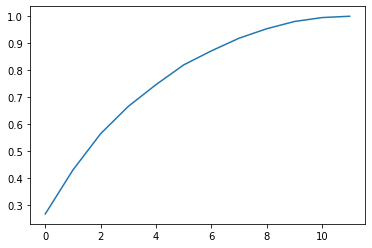

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [0]:
# PCA with 2 components:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(df_std)

In [0]:
target=wine['quality']

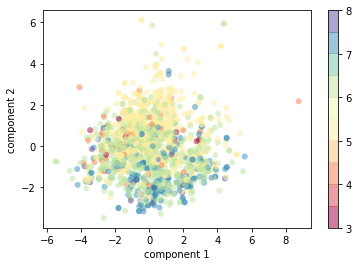

In [40]:
# The following will plot your first two components
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**LOGISTIC REGRESSION**

In [0]:
X=x
y=target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

In [0]:
import statsmodels.api as sm
#X_train = sm.add_constant(X_train)
results = sm.Logit( y_train,X_train).fit()


# We print the summary results
print(results.summary())